In [24]:
import sys

# import from dirs below
sys.path.insert(0, "..")
sys.path.insert(0, "../src")
sys.path.insert(0, "../src/new_generation")

In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import random

from common.params import N, SEED
from graph_generation import generate_city_graph

from new_generation.Mutators import LineMutator, GenotypeMutator
from new_generation.SpecimenCrossers import GenotypeCrosser

## Symulacja

Population     0, best fitness function:          -135.056986, best lines stops count: Counter({10: 2, 3: 2, 16: 2, 20: 1, 13: 1, 5: 1, 18: 1})


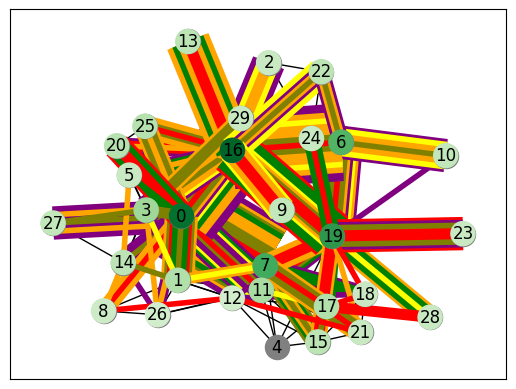

Population    40, best fitness function:            16.547462, best lines stops count: Counter({10: 1, 7: 1, 8: 1})


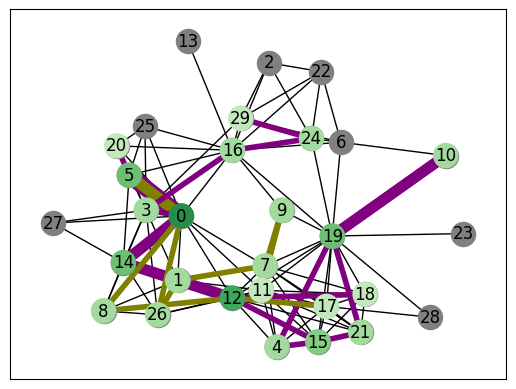

Population    80, best fitness function:            20.098679, best lines stops count: Counter({13: 2, 2: 1, 8: 1})


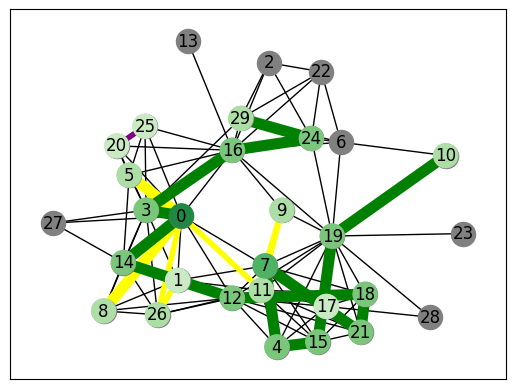

Population   120, best fitness function:            21.357028, best lines stops count: Counter({13: 1, 8: 1, 15: 1})


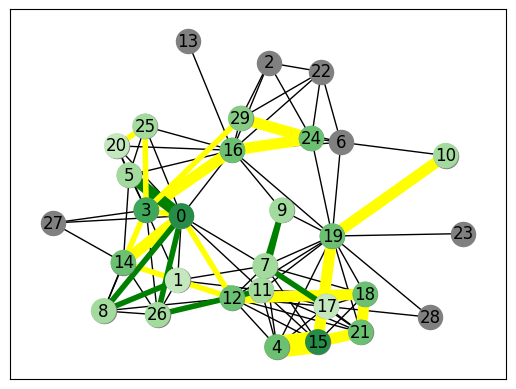

Population   160, best fitness function:            22.164957, best lines stops count: Counter({15: 1, 13: 1, 8: 1, 2: 1})


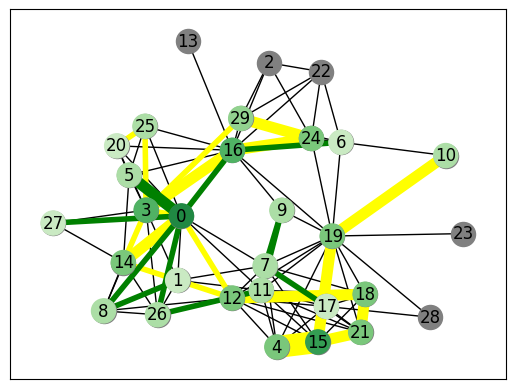

Population   200, best fitness function:            22.768704, best lines stops count: Counter({15: 2, 8: 1})


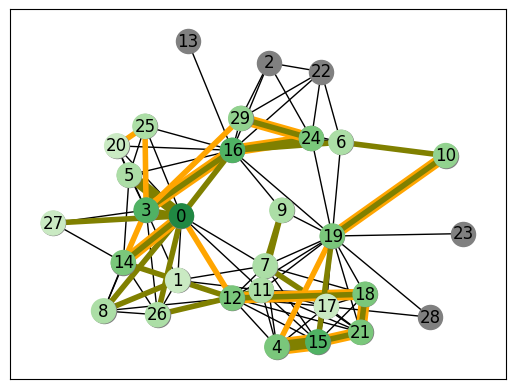

In [27]:
from SimultionEngine import SimulationEngine
from common.params import N_IN_POPULATION
from fitness import fitness
from initial_population import create_initial_population
from new_generation.new_generation_function import new_generation_random
from survival import n_best_survive


random.seed(SEED)

G, best_paths = generate_city_graph(N)

line_mutator = LineMutator(G, best_paths)
genotype_mutator = GenotypeMutator(G, best_paths)
genotype_crosser = GenotypeCrosser(best_paths)

sim_engine = SimulationEngine(
    G,
    initial_population=create_initial_population(G, best_paths),
    fitness_function=fitness,
    survival_function=lambda population: n_best_survive(
        population, N_IN_POPULATION // 5
    ),
    new_generation_function=lambda population, graph: new_generation_random(
        population,
        N_IN_POPULATION,
        line_mutator,
        genotype_mutator,
        genotype_crosser,
    ),
)

sim_engine.run(200, 40, report_show=True)

Population     0, best fitness function:          -130.260562, best lines stops count: Counter({11: 3, 14: 2, 19: 1, 10: 1, 3: 1, 12: 1, 16: 1})


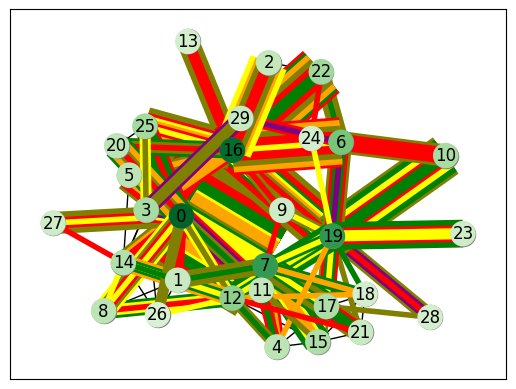

Population    40, best fitness function:             8.457346, best lines stops count: Counter({2: 4, 3: 3, 6: 1, 12: 1, 4: 1})


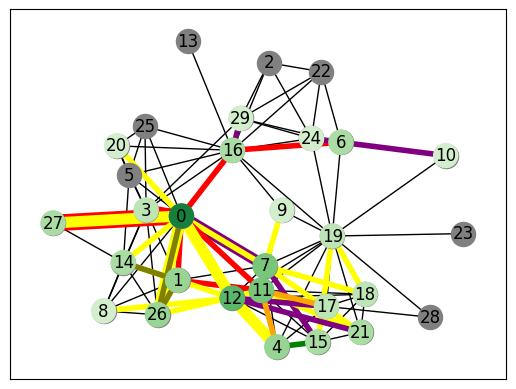

Population    80, best fitness function:            11.387889, best lines stops count: Counter({2: 5, 4: 2, 3: 2, 12: 1})


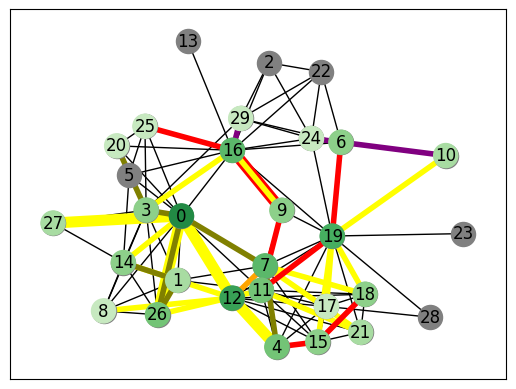

Population   120, best fitness function:            12.471952, best lines stops count: Counter({2: 4, 3: 3, 12: 1, 4: 1, 5: 1})


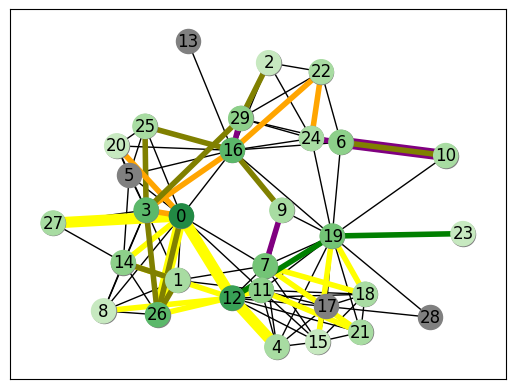

Population   160, best fitness function:            13.033294, best lines stops count: Counter({3: 4, 2: 3, 4: 2, 12: 1})


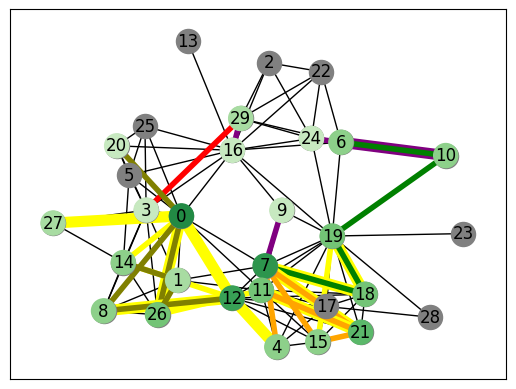

Population   200, best fitness function:            13.794959, best lines stops count: Counter({3: 4, 2: 3, 4: 3})


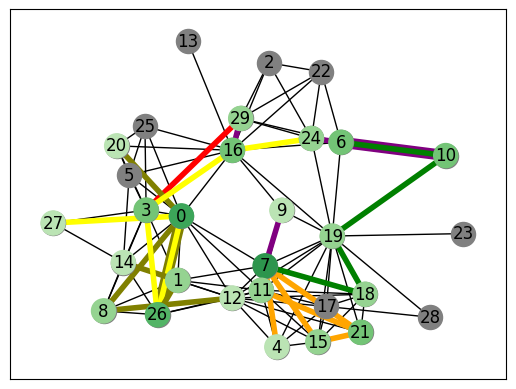

In [28]:
from new_generation.primite_new_generation import new_generation_replace_random_line

sim_engine = SimulationEngine(
    G,
    initial_population=create_initial_population(G, best_paths),
    fitness_function=fitness,
    survival_function=lambda population: n_best_survive(
        population, N_IN_POPULATION // 5
    ),
    new_generation_function=lambda population, graph: new_generation_replace_random_line(
        population, graph, N_IN_POPULATION, best_paths
    ),
)

sim_engine.run(200, 40, report_show=True)